# 线性回归

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

## 生成数据集

In [3]:
def synthetic_data(w, b, num_examples):

    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2

features, labels = synthetic_data(true_w, true_b, 1000)

In [4]:
print('features:', features[0], '\nlabel', labels[0])

features: tensor([-0.6435,  0.8479]) 
label tensor([0.0351])


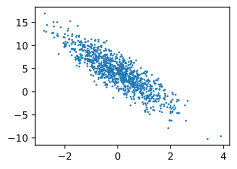

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

## 读取数据集

In [16]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        batch_indces = torch.tensor(indices[i : min(i + batch_size, num_examples)])

        yield features[batch_indces], labels[batch_indces]


In [17]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.7269, -1.1338],
        [-0.6518,  1.6617],
        [-1.9639,  0.0333],
        [-0.2337,  0.6760],
        [ 0.2414,  0.2714],
        [ 0.1369, -0.8123],
        [-1.0577, -1.4956],
        [-2.7989,  1.9121],
        [-0.2968,  1.4954],
        [-0.5623, -0.9291]]) 
 tensor([[ 6.5974],
        [-2.7512],
        [ 0.1489],
        [ 1.4246],
        [ 3.7737],
        [ 7.2446],
        [ 7.1596],
        [-7.9023],
        [-1.4788],
        [ 6.2311]])


## 初始化模型参数

In [18]:
w = torch.normal(0, 0.01, size = (2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[ 0.0032],
         [-0.0097]], requires_grad=True),
 tensor([0.], requires_grad=True))

## 定义模型

In [19]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

## 定义损失函数

In [21]:
def squared_loss(y_hat, y): #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2 / 2

## 定义优化算法

In [23]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

## 训练

In [24]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.036438
epoch 2, loss 0.000134
epoch 3, loss 0.000053


In [25]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([7.0417e-04, 5.2929e-05], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
